In [24]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle

In [25]:
## Load the data
car = pd.read_csv("full_car_data_and_price.csv")
car.head()

,name,company,year,price($),color,hand,engine(saland),transmission,fuel_type
0,lexus lx570,lexus,2007,30000,white,left,8 saland,automatic,petrol
1,lexus lx570,lexus,2007,28000,black,left,8 saland,automatic,petrol
2,lexus lx570,lexus,2007,27000,crimson,left,8 saland,automatic,petrol
3,lexus lx570,lexus,2008,32000,white,left,8 saland,automatic,petrol
4,lexus lx570,lexus,2008,30000,black,left,8 saland,automatic,petrol


In [26]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            514 non-null    object
 1   company         514 non-null    object
 2   year            514 non-null    int64 
 3   price($)        514 non-null    int64 
 4   color           514 non-null    object
 5   hand            514 non-null    object
 6   engine(saland)  514 non-null    object
 7   transmission    514 non-null    object
 8   fuel_type       514 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.3+ KB


In [27]:
car.shape

(514, 9)

In [28]:
#checking the distribution of categorical data
print(car.name.value_counts())
print(car.company.value_counts())
print(car.color.value_counts())
print(car.hand.value_counts())
print(car.transmission.value_counts())
print(car.fuel_type.value_counts())

name
toyota corolla              80
toyota hilux                60
benz                        57
toyota land cruiser         51
4 runner                    40
toyota corolla fielder      38
lexus lx570                 32
range rover                 30
suzuki                      24
toyota prius hybrid         24
toyota corolla hatchback    23
mercedes istana             16
toyota hiace                15
toyota coaster              14
toyota townace              10
Name: count, dtype: int64
company
toyota              355
mercedes benz        73
lexus                32
jagur land rover     30
suzuki               24
Name: count, dtype: int64
color
white        206
black        154
silver        55
crimson       49
gold          21
navy blue      9
red            8
yellow         7
blue           5
Name: count, dtype: int64
hand
left     472
right     42
Name: count, dtype: int64
transmission
automatic    356
manual       158
Name: count, dtype: int64
fuel_type
petrol    390
diesel    1

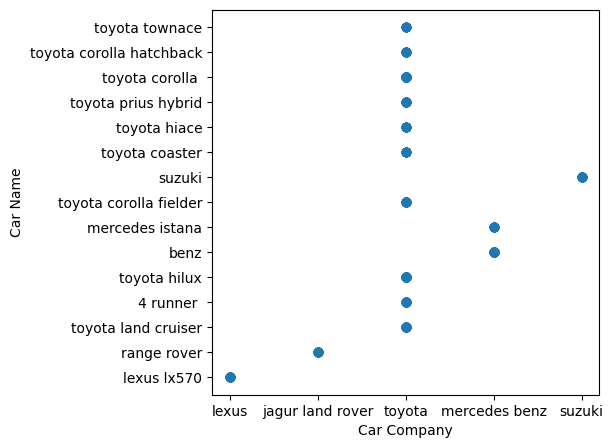

In [29]:
plt.figure(figsize=(5, 5))
plt.scatter(car['company'], car['name'])
plt.xlabel('Car Company')
plt.ylabel('Car Name')
plt.show()

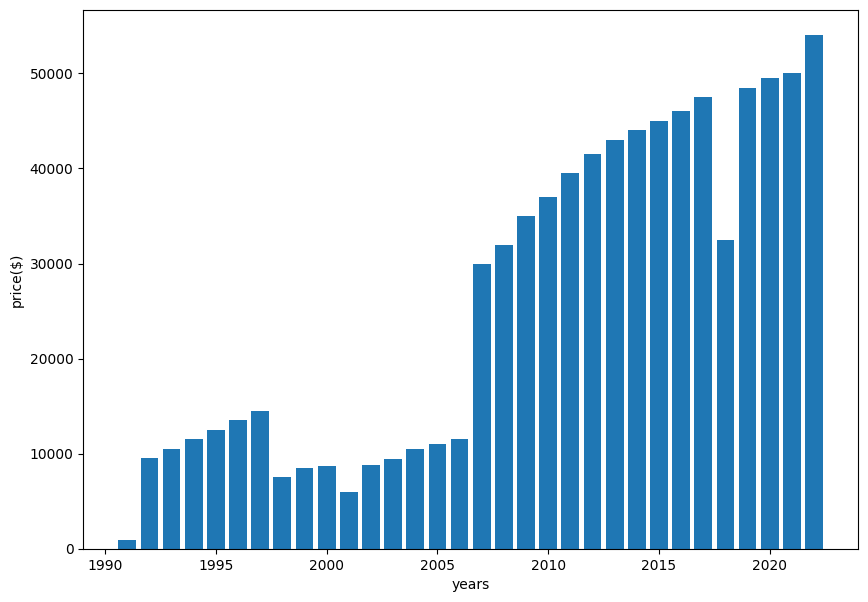

In [30]:
plt.figure(figsize=(10, 7))
plt.bar(car['year'], car['price($)'])
plt.xlabel('years')
plt.ylabel('price($)')
plt.show()

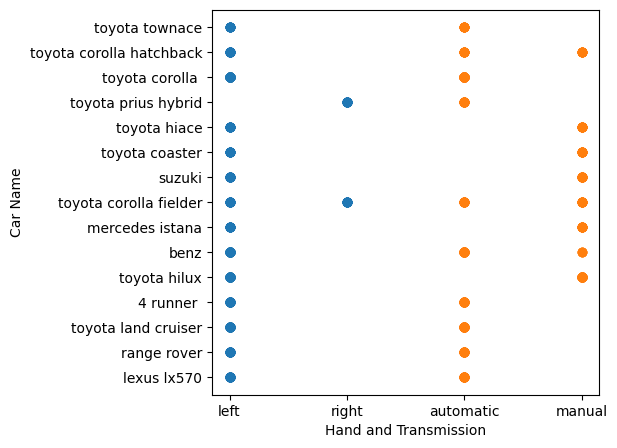

In [31]:
plt.figure(figsize=(5, 5))
plt.scatter(car['hand'], car['name'])
plt.scatter(car['transmission'], car['name'])
plt.xlabel('Hand and Transmission')
plt.ylabel('Car Name')
plt.show()

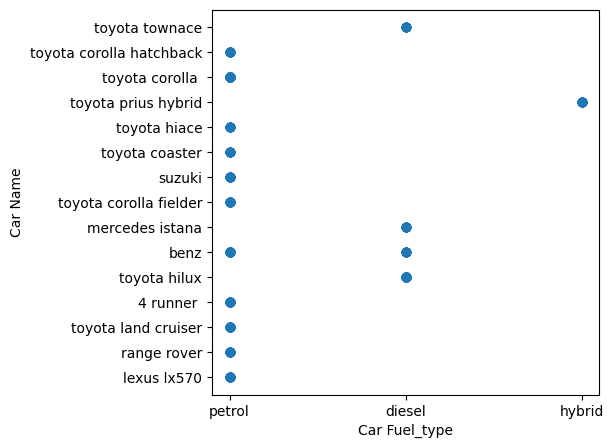

In [32]:
plt.figure(figsize=(5, 5))
plt.scatter(car['fuel_type'], car['name'])
plt.xlabel('Car Fuel_type')
plt.ylabel('Car Name')
plt.show()

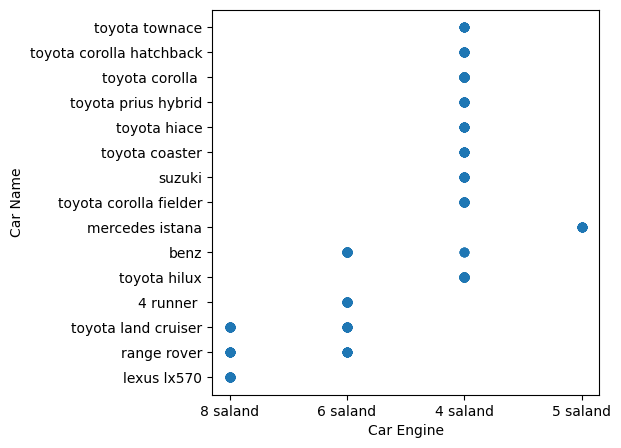

In [33]:
plt.figure(figsize=(5, 5))
plt.scatter(car['engine(saland)'], car['name'])
plt.xlabel('Car Engine')
plt.ylabel('Car Name')
plt.show()

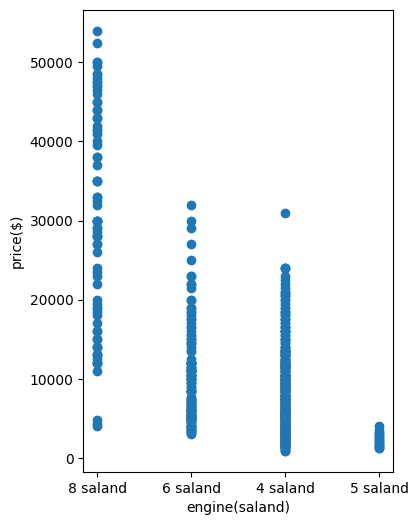

In [34]:
plt.figure(figsize=(4, 6))
plt.scatter(car['engine(saland)'], car['price($)'])
plt.xlabel('engine(saland)')
plt.ylabel('price($)')
plt.show()

In [35]:
print('Company:', car['company'].unique())
print('Years For Car:', car['year'].unique())
print('Color:', car['color'].unique())
print('hand:', car['hand'].unique())
print('Engine:', car['engine(saland)'].unique())
print('transmission:', car['transmission'].unique())
print('fuel_type:', car['fuel_type'].unique()) 

Company: ['lexus' 'jagur land rover' 'toyota' 'mercedes benz' 'suzuki']
Years For Car: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2019 2020 2021
 2022 2004 2005 2006 2018 2000 2001 2002 2003 1991 1992 1993 1994 1995
 1996 1997 1998 1999]
Color: ['white' 'black' 'crimson' 'navy blue' 'gold' 'silver' 'yellow' 'red'
 'blue']
hand: ['left' 'right']
Engine: ['8 saland' '6 saland' '4 saland' '5 saland']
transmission: ['automatic' 'manual']
fuel_type: ['petrol' 'diesel' 'hybrid']


In [36]:
# Label Encoding categorical variables 
catagorical_vars = ('name', 'company', 'color', 'hand', 'engine(saland)', 'transmission','fuel_type')
label_encoder = LabelEncoder()
for var in catagorical_vars:
    car[var] = label_encoder.fit_transform(car[var])

In [37]:
# Splitting data into training and testing sets
X = car[['name', 'company','year', 'color', 'hand', 'engine(saland)', 'transmission','fuel_type']]
y = car['price($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Training Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
linear_regression_predictions = linear_regression_model.predict(X_test)
linear_regression_accuracy = r2_score(y_test, linear_regression_predictions)
print("Linear Regression R2_Score:", linear_regression_accuracy)

Linear Regression R2_Score: 0.5438551627409371


In [39]:
# Training KNR model
knr_model = KNeighborsRegressor()
knr_model.fit(X_train, y_train)
knr_predictions = knr_model.predict(X_test)
knr_accuracy = r2_score(y_test, knr_predictions)
print("The KNR R2_Score:", knr_accuracy)

The KNR R2_Score: 0.7652042643499805


In [40]:
# Training Decision Tree Regressor model
decision_tree_regressor_model = DecisionTreeRegressor()
decision_tree_regressor_model.fit(X_train, y_train)
decision_tree_regressor_predictions = decision_tree_regressor_model.predict(X_test)
decision_tree_regressor_accuracy = r2_score(y_test, decision_tree_regressor_predictions)
print("Decision Tree Regressor R2_Score:", decision_tree_regressor_accuracy)

Decision Tree Regressor R2_Score: 0.9907744547170259


In [41]:
models = ['linear_regression_model', 'knr_model', 'decision_tree_regressor_model']
models_accuracies = ['linear_regression_R2_Score', 'knr_R2_Score', 'decision_tree_regressor_R2_Score']

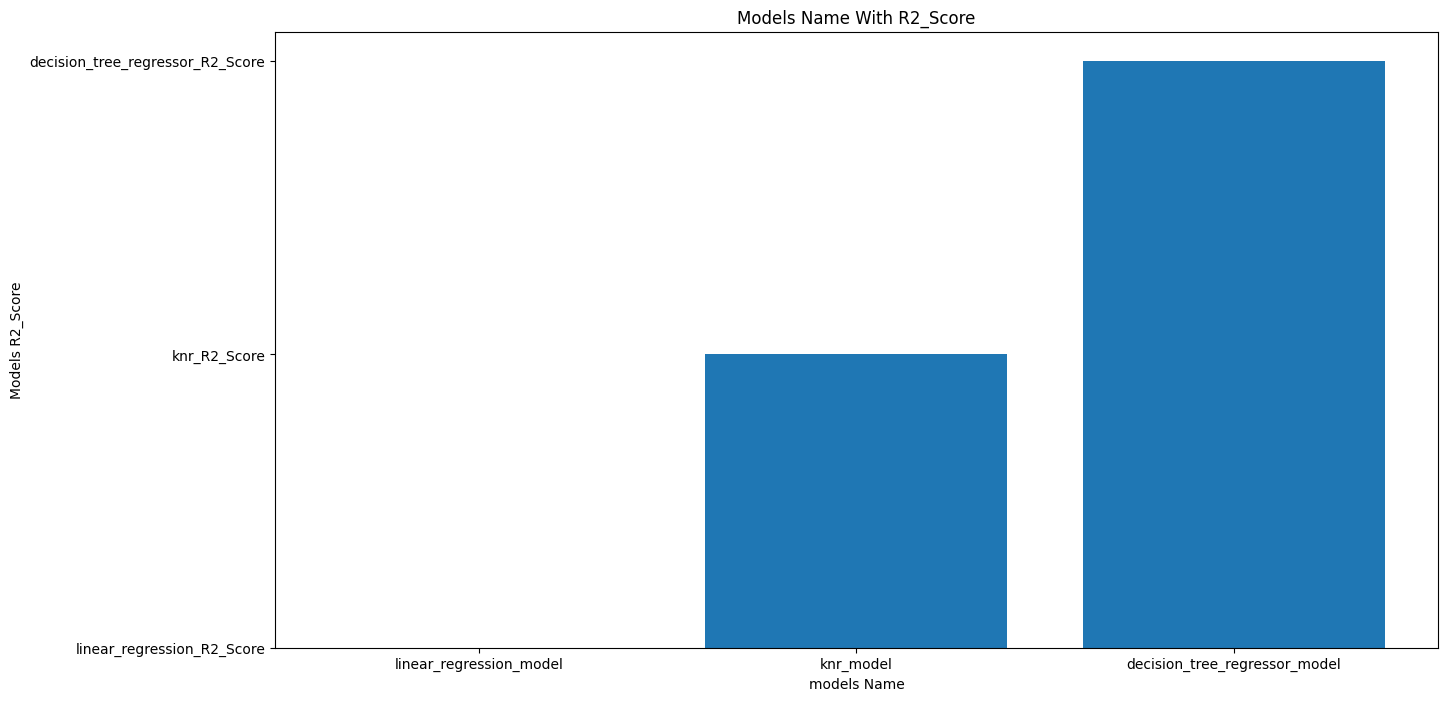

In [42]:
plt.figure(figsize=(15, 8))
plt.bar(models, models_accuracies)
plt.xlabel('models Name')
plt.ylabel('Models R2_Score')
plt.title('Models Name With R2_Score')
plt.show()

In [43]:
# Save the trained model to a file
pickle.dump(decision_tree_regressor_model, open('decision_tree_regressor_model.pkl', 'wb'))

In [44]:
# Load the trained model from the file
loaded_model = pickle.load(open('decision_tree_regressor_model.pkl', 'rb'))

In [46]:
# Example prediction using the loaded Model
new_data = pd.DataFrame([[0, 0, 2009, 1, 2, 1, 0, 0]], 
columns=['name', 'company', 'year', 'color', 'hand', 'engine(saland)', 'transmission', 'fuel_type'])
prediction = loaded_model.predict(new_data)
print("Prediction:", prediction)

Prediction: [12000.]
